# 3.1

**（1）给出实验的零假设**

由于我们想研究毒品是否会增强人体的攻击性，出于谨慎性的原则，将毒品不能增强人体的攻击性作为原假设。结合题目可知，组A代表使用安慰剂的群体，组B代表使用毒品的群体，如果组A的得分水平显著低于组B的得分水平，则说明支持备择假设。相应地，原假设的含义为组A的得分水平高于或等于组B的得分水平，即：

$$ H_{0}\colon M_{a}\geq M_{b}\quad H_{1}\colon M_{a}\lt M_{b} $$

**（2）画出表现这些数据特点的曲线图**

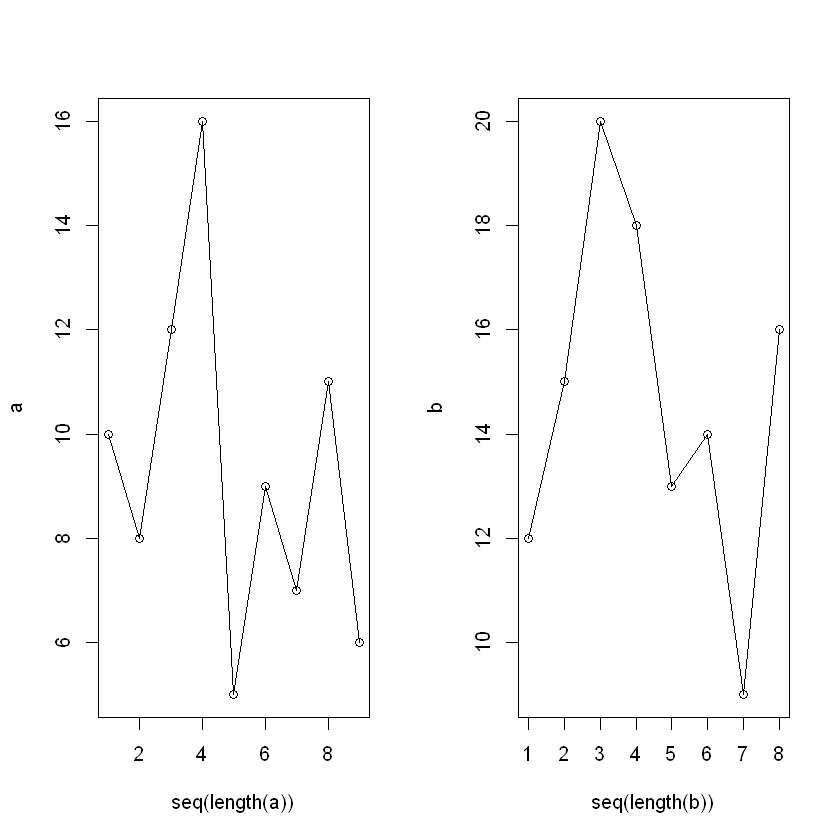

In [26]:
a = c(10,8,12,16,5,9,7,11,6)
b = c(12,15,20,18,13,14,9,16)

par(mfrow=c(1,2))
plot(seq(length(a)),a,'o')
plot(seq(length(b)),b,'o')

可以看到，a组的得分大约在6-16范围内，b组的得分大约在10-20范围内。

**（3）分析这些数据用哪种检验方法最合适**

我们希望比较两组总体的位置参数是否相同。Wilcoxon秩和检验主要针对两样本量相同的情况，而Brown-Mood检验与符号检验的思想类似，仅仅比较了两组数据的符号。并且，根据绘制的直方图我们知道，a样本的总体不像是正态分布，而两个总体的分布有类似的形状。因此综上所述，我们应当使用Wilcoxon-Mann-Whitney检验（简称W-M-W检验）。这种方法适用于样本量不同时的比较，并且能够利用到数据的位置的信息。

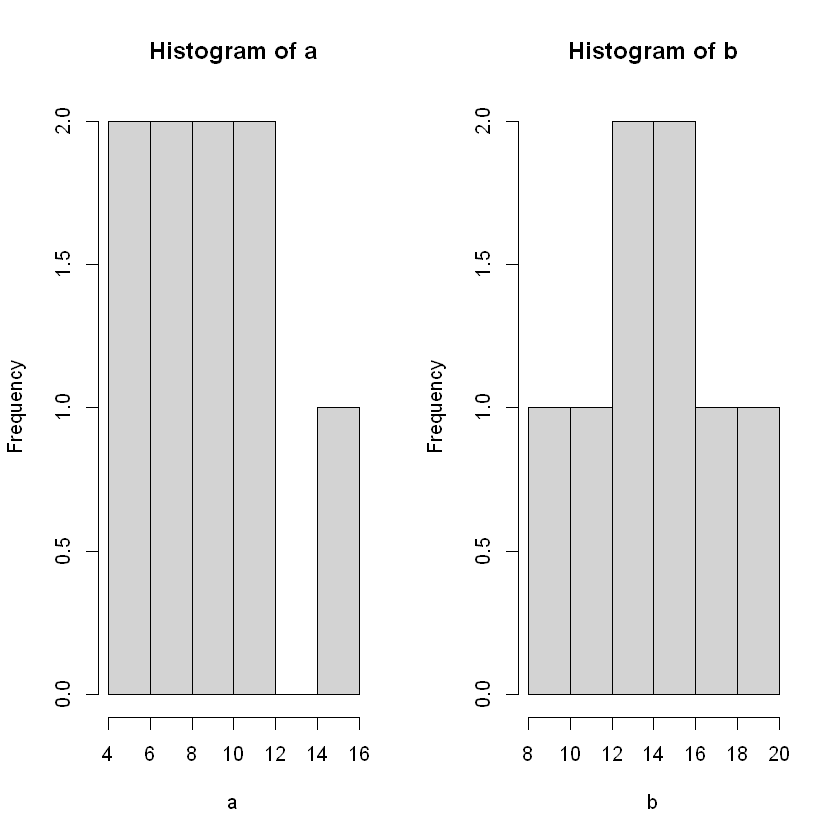

In [27]:
par(mfrow=c(1,2))
hist(a)
hist(b)

**（4）使用W-M-W检验对数据进行检验**

In [28]:
my_data <- data.frame( group = c(rep("A",9),rep("B",8)),
                       score = c(a, b) )
wilcox.test(score ~ group, data = my_data,alternative = "less",paired=FALSE)

Warning message in wilcox.test.default(x = c(10, 8, 12, 16, 5, 9, 7, 11, 6), y = c(12, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  score by group
W = 9.5, p-value = 0.006097
alternative hypothesis: true location shift is less than 0



**（5）解释数据**

由于我们的备择假设是B组的得分大于A组的得分，而检验的p值为0.006，小于显着性水平alpha = 0.05，因而拒绝原假设，认为毒品能显著增强人体的攻击性。

由于p值已经达到了0.006，将近0，因此我们有理由拒绝原假设而接受备择假设。但是由于数据过少，是小样本数据，偶然性过大，难以对真实情况做出可靠的统计推断。样本大小大于30时，检验的效果最好。

# 3.2

**（1、3）q分位数检验内容**

为了对两个总体的分位数进行检验，这里我们使用BM检验。首先，假设有两组来自不同分布 $\mathrm{F}(\mathrm{x})$ 和 $\mathrm{F}(\mathrm{x}-\mathrm{u})$ 的相互独立的样本，有相应的 $\mathrm{q}$ 分位数 $q_{X}$ 和 $q_{Y}$.则假设检验问题为:

$$
H_{0}: q_{X}=q_{Y} \quad H_{1}: q_{X} \neq q_{Y}
$$

在零假设下, 如果两组数据有相同的 q 分位数, 则将两组数据混合以后, 两组数据的混合中位数 $q_{X Y}$ 与 $q_{X}$ 和 $q_{Y}$ 相等。因此, 我们首先找出混合数据中样本的 $\mathrm{q}$ 分位数 $Q_{X Y}$, 用 $\mathrm{A}$ 表示 $\mathrm{X}$ 样本中大于 $Q_{X Y}$ 的点数, $\mathrm{t}$ 表示混合样本中大于 $Q_{X Y}$ 的样本点的 个数。设 $X$ 和 $Y$ 的样本量分别为 $m$ 和 $n$ 。当给定 $m 、 n$ 和 $t$ 时，如果 $A$ 的数值过大或者过小, 则考虑拒绝原假设, 接受备 择假设。该检验中的 $P$ 值定义如下:

$$
2 \min \left\{P_{\text {hyper }}(\mathrm{A} \leq \mathrm{a}), P_{\text {hyper }}(\mathrm{A} \geq \mathrm{a})\right\}
$$

对于水平 $\mathrm{a}$, 如果 $\mathrm{P}$ 值 $<\mathrm{a}$, 拒绝 $H_{0}$ ，认为两样本的总体没有相同的 $\mathrm{q}$ 分位数；否则不能拒绝。

在大样本的时候, 在零假设下, 可以利用超几何分布的正态近似进行检验:

$$
\mathrm{Z}=\frac{A-\frac{m t}{m+n}}{\sqrt{\frac{m n t(m+n-t)}{(m+n)^{3}}}} \stackrel{\mathcal{L}}{\rightarrow} \mathrm{N}(0,1)
$$

小样本时, 也可以使用连续性修正:

$$
\mathrm{Z}=\frac{A \pm 0.5-\frac{m t}{m+n}}{\sqrt{\frac{m n t(m+n-t)}{(m+n)^{3}}}} \stackrel{\mathcal{L}}{\rightarrow} \mathrm{N}(0,1)
$$

In [12]:
# Brown - Mood检验 任意Q分位数 函数
BMq.test = function(x,y,q,alt){
    xy = c(x,y)
    quantile.xy = quantile(xy,q)
    t = sum(xy>quantile.xy)
    lx = length(x[x!=quantile.xy])
    ly = length(y[y!=quantile.xy])
    lxy = lx+ly
    A = sum(x>quantile.xy) # 检验统计量A
    z = (A-lx*t/(lx+ly))/(lx*ly*t*(lx+ly-t)/(lx+ly)^3)^0.5
    # 正态近似时的标准化统计量
    if(A>(min(lx,t)/2)){
        z1 = (A+0.5-lx*t/(lx+ly))/(lx*ly*t*(lx+ly-t)/(lx+ly)^3)^0.5 # 连续性修正后正态近似时的标准化统计量
    }
    else {
       z1 = (A-0.5-lx*t/(lx+ly))/(lx*ly*t*(lx+ly-t)/(lx+ly)^3)^0.5
    }
    if(alt == 'greater'){
        pv1 = 1-phyper(A,lx,ly,t) # 精确P值
        pv2 = 1-pnorm(z) # 正态近似P值
        pv3 = 1-pnorm(z1) # 连续性修正后正态近似p值
    }
    if(alt == 'less'){
        pv1 = phyper(A,lx,ly,t) # 精确P值
        pv2 = pnorm(z) # 正态近似P值
        pv3 = pnorm(z1) # 连续性修正后正态近似p值
    } 
    if(alt == 'two.sized'){
        pv1 = 2*min(1-phyper(A,lx,ly,t),phyper(A,lx,ly,t))
        pv2 = 2*min(1-pnorm(z),pnorm(z))
        pv3 = 2*min(1-pnorm(z1),pnorm(z1))
    }
    conting.table = matrix(c(A,lx-A,lx,t-A,ly-(t-A),ly,t,lxy-t,lxy),3,3) # 计数表
    col.name = c('X','Y','X+Y')
    row.name = c('>MQXY','<MQXY','TOTAL')
    dimnames(conting.table) = list(row.name,col.name)
    print(list(continency.table = conting.table,p.value = pv1,pvnorm = pv2,pvnr = pv3))
}

In [22]:
# 应用函数检验0.25分位点
BMq.test(a,b,0.25,'two.sized')

$continency.table
      X Y X+Y
>MQXY 4 7  11
<MQXY 4 0   4
TOTAL 8 7  15

$p.value
[1] 0.1025641

$pvnorm
[1] 0.02891399

$pvnr
[1] 0.005608499



In [23]:
# 应用函数检验0.75分位点
BMq.test(a,b,0.75,'two.sized')

$continency.table
      X Y X+Y
>MQXY 1 3   4
<MQXY 8 4  12
TOTAL 9 7  16

$p.value
[1] 0.3846154

$pvnorm
[1] 0.1457285

$pvnr
[1] 0.04168008



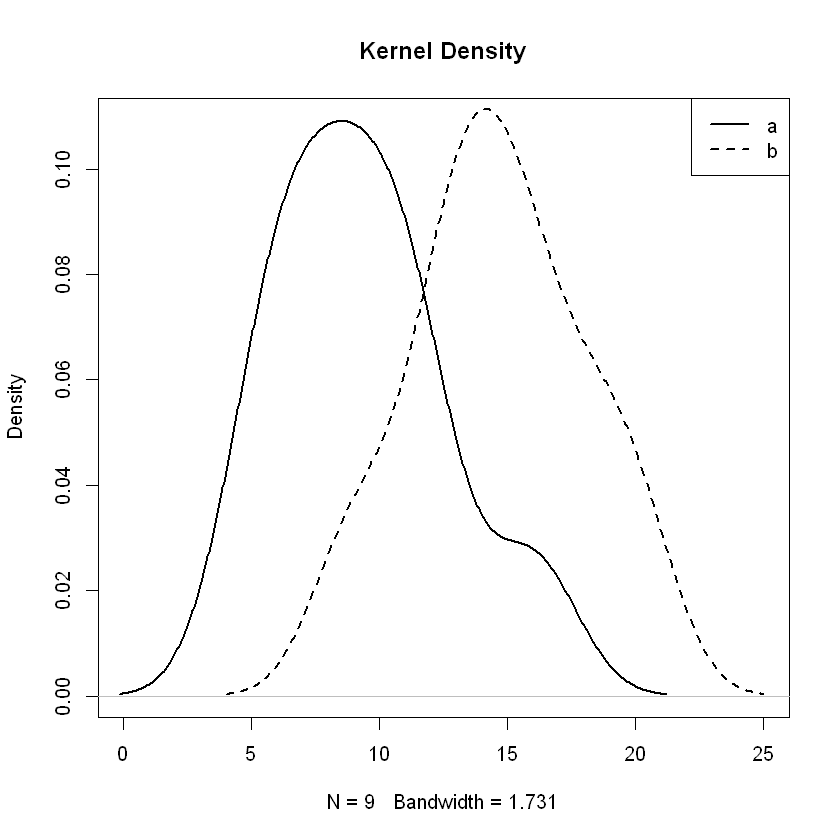

In [17]:
# 最后画出两组数据的核密度估计图
plot(density(a),main = 'Kernel Density',lwd = 2,xlim = c(0,25))
lines(density(b),lwd = 2,lty = 2)
legend('topright',legend = c('a','b'),lty = c(1,2),lwd = c(2,2))

**（2、4）结果分析**

检验0.25分位点时，P值为0.1025641>0.05；正态近似检验的P值为0.02891399<0.05；连续修正检验的P值为0.005608499<0.05.

检验0.75分位点时，P值为0.3846154>0.05；正态近似检验的P值为0.1457285>0.05；连续修正检验的P值为0.04168008<0.05.

可以看到，精确P值均大于0.05，不能拒绝原假设，认为两个样本25%和75%的分位数没有显著性不同。虽然正态近似和连续性修正后的P值都比较小，但是本例样本的数据量过小，精确分布P值更为可信。因而最终我们认为两组数据的分布的25%和75%的分位数在统计上是相同的。根据画出的核密度估计图，可以含明显的看到两组数据的25%和75%的分位数较为接近。

# 3.3

**（1）给出实验的零假设**

由于我们想研究在人际关系处理方面受过训练的保险代理人是否会给潜在顾客留下好的印象，出于谨慎性的原则，将在人际关系处理方面受过训练的保险代理人不会给潜在顾客留下好的印象作为原假设。结合题目可知，训练组代表接受人际关系训练的群体，控制组代表没有接受训练的群体，如果train组a的得分水平显著高于control组b的得分水平，则说明支持备择假设。相应地，原假设的含义为train组a的得分水平低于或等于control组b的得分水平，即：

$$ H_{0}\colon M_{a}\leq M_{b}\quad H_{1}\colon M_{a}\gt M_{b} $$

**（2）画出表现这些数据特点的曲线图**

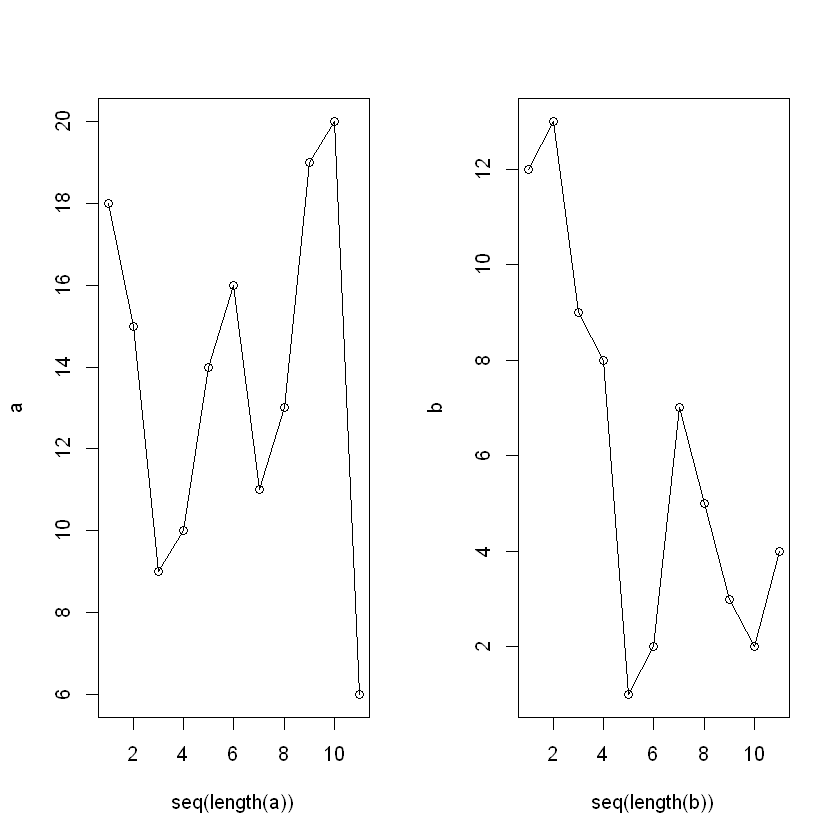

In [40]:
a = c(18,15,9,10,14,16,11,13,19,20,6)
b = c(12,13,9,8,1,2,7,5,3,2,4)

par(mfrow=c(1,2))
plot(seq(length(a)),a,'o')
plot(seq(length(b)),b,'o')

可以看到，a组的得分大约在10-20范围内，b组的得分大约在0-10范围内。

**（3）分析这些数据用哪种检验方法最合适**

我们希望比较两组总体的位置参数是否相同。绘制数据的直方图可以看到，两个总体的分布不服从正态分布，不能用参数检验方法；且没有类似的形状，也不是对称的，不能用MWM检验和秩和检验方法。因此综上所述，我们可以使用BM检验对数据的中位数进行检验。

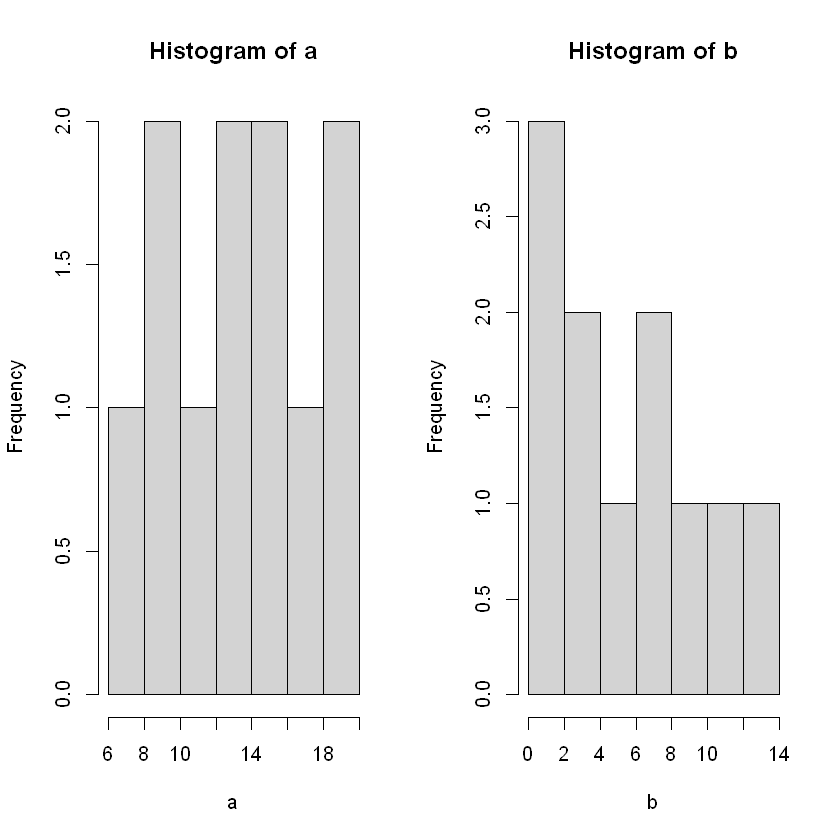

In [33]:
par(mfrow=c(1,2))
hist(a)
hist(b)


**（4）使用BM检验对数据进行检验**

In [41]:
BMq.test(a,b,0.5,'two.sized')

$continency.table
       X  Y X+Y
>MQXY  9  2  11
<MQXY  2  9  11
TOTAL 11 11  22

$p.value
[1] 0.0003458873

$pvnorm
[1] 0.002837545

$pvnr
[1] 0.0006467491



**（5）解释数据**

由于我们的备择假设是B组的得分大于A组的得分，而精确分布的检验p值远远小于显着性水平alpha = 0.05，因而拒绝原假设，认为train组a的得分水平显著高于control组b的得分水平，即在人际关系处理方面受过训练的保险代理人会给潜在顾客留下好的印象。

由于p值非常小，因此我们有理由拒绝原假设而接受备择假设。但是由于数据过少，是小样本数据，偶然性过大，难以对真实情况做出可靠的统计推断。样本大小大于30时，检验的效果最好。

# 3.4

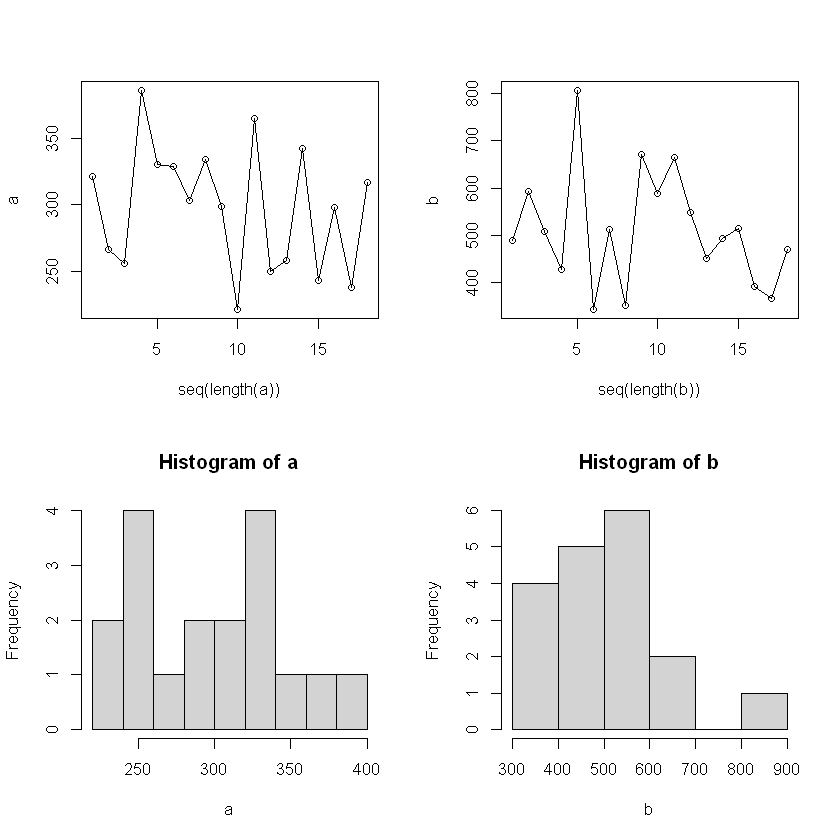

In [19]:
# 绘图观察
a = c(321,266,256,386,330,329,303,334,299,221,365,250,258,342,243,298,238,317)
b = c(488,593,507,428,807,342,512,350,672,589,665,549,451,492,514,391,366,469)
par(mfrow=c(2,2))
plot(seq(length(a)),a,'o')
plot(seq(length(b)),b,'o')
hist(a)
hist(b)

通过观察数据的直方图和点线图，可以发现，两个样本具有相似的分布，类似正态分布。而A学院的课时量约在250-350之间，B学院的课时量约在400-800之间，平均情况相差较大。

In [7]:
# 正态分布检验
ks.test(a,pnorm,mean(a),sd(a))
ks.test(b,pnorm,mean(b),sd(b))


	One-sample Kolmogorov-Smirnov test

data:  a
D = 0.13775, p-value = 0.8393
alternative hypothesis: two-sided



	One-sample Kolmogorov-Smirnov test

data:  b
D = 0.15453, p-value = 0.7272
alternative hypothesis: two-sided


P值均大于0.05，不能拒绝原假设，即不能认为数据不服从正态分布。

In [10]:
# 均值t检验
t.test(a,b)


	Welch Two Sample t-test

data:  a and b
t = -6.8841, df = 21.916, p-value = 6.637e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -276.8201 -148.6243
sample estimates:
mean of x mean of y 
 297.5556  510.2778 


根据两样本均值t检验的结果，P值远小于0.05，由于备择假设是两个样本的总体均值不同，故拒绝原假设，接受备择假设，认为两个样本的总体的平均水平不同。

In [13]:
# 中位数BM检验
BMq.test(a,b,0.5,'two.sized')

$continency.table
       X  Y X+Y
>MQXY  2 16  18
<MQXY 16  2  18
TOTAL 18 18  36

$p.value
[1] 5.230556e-06

$pvnorm
[1] 3.061253e-06

$pvnr
[1] 5.733031e-07



根据BM检验的结果，精确分布、正态近似、小样本修正的P值均远远小于0.05，因而拒绝原假设，认为两个样本的总体的中位数显著不同。

In [23]:
# 方差一致检验
diff = median(a)-median(b)
b1 = b+diff
mood.test(a,b1)

sd(a)>sd(b)


	Mood two-sample test of scale

data:  a and b1
Z = -2.3727, p-value = 0.01766
alternative hypothesis: two.sided


[1] FALSE

P值小于0.05，拒绝原假设，即认为两组数据的方差显著不相同。

综上分析，两个学院的课时量水平相差很大，不论是平均值还是中位数都显著不同，其中B学院的课时量较多。并且，两个学院的课时量方差并不相似，即认为教授完成讲课任务的情况并不相似。A的方差更小，说明B学院的教师讲课情况的课时量差距比较大。

# 3.5

**（1）Mood检验**


Mood 检验法假设两位置参数相等。在检验之前首先应该将两组数据的位置参数调整到相同。有两组来自不同分布 $\mathrm{F}\left(\frac{\mathrm{x}}{\sigma_{1}}\right)$ 和 $\mathrm{F}\left(\frac{\mathrm{x}}{\sigma_{2}}\right)$ 的相互独立的样本 $X$ 和 $\mathrm{Y}$, 我们检验的问题是

$$
H_{0}: \sigma_{1}^{2}=\sigma_{2}^{2} \quad H_{1}: \sigma_{1}^{2} \neq \sigma_{2}^{2}
$$

当零假设成立时, 对 $X$ 样本来说，考虑秩检验统计量

$$
\mathrm{M}=\sum_{i=1}^{m}\left(R_{i}-\frac{m+n+1}{2}\right)^{2}
$$

如果它的值偏大，则 $X$ 的方差也可能偏大。在零假设下, $M$ 的分布可以由秩的分布性质得出.

In [7]:
a = c(8.8,8.2,5.6,4.9,8.9,4.2,3.6,7.1,5.5,8.6,6.3,3.9)
b = c(13.0,14.5,16.5,22.8,20.7,19.6,18.4,21.3,24.2,19.6,11.7,18.9,14.6,19.8,14.5)
diff = median(a)-median(b)
b1 = b+diff
mood.test(a,b1)


	Mood two-sample test of scale

data:  a and b1
Z = -1.5502, p-value = 0.1211
alternative hypothesis: two.sided


根据结果，P值=0.1211>0.05，不能拒绝原假设，即认为两样本的总体的方差不存在差异，即两块土壤的有机质含量的内部变异性没有差异。

**（2）Moses检验**

Moses 检验无需事先假设两分布的位置参数相等。其对问题的假设是:

Moses 检验法的统计值 $T$ 求法如下:

$$
H_{0}: \sigma_{1}^{2}=\sigma_{2}^{2} \quad H_{1}: \sigma_{1}^{2} \neq \sigma_{2}^{2}
$$

(1) 将两样本各分成几组, 样本 1 随机分成 $m_{1}$ 个组, 样本 2 随机分成 $m_{2}$ 个组, 每组含 $k$ 个观测值

(2) 分别求各小组的样本离差平方和 $S S A_{r}$ 和 $S S B_{S}$

(3) 将两样本各小组的平方和 $S S A_{r}$ 和 $S S B_{s}$ 混合，排序按大小定秩

(4) 计算第 1 组样本的 $m_{1}$ 组平方和的秩和, 用 $S$ 表示, 则统计量 $T_{M}$ 为

$$
T_{M}=S-\frac{m_{1}\left(m_{1}+1\right)}{2}
$$

如果两组数据的方差存在很大的差异, 从平均来看, 一组数据的平方和会比另一组数据的平方和小。因此, 如果 $T_{M}<$ $W_{0.025, m_{1}, m_{2}}$, 则不能拒绝 $H_{1}$, 反之则接受 $H_{0}$

In [17]:
VarRank = function(x,y,K=3)
{
  m1 = floor(length(x)/K)
  m2 = floor(length(y)/K)
  x.VR = c()
  y.VR = c()
  x.temp = x
  y.temp = y
  for (r in 1:m1){
    x.index = sample(1:length(x.temp),K)
    x.VR = c(x.VR,var(x.temp[x.index])*(K-1))
    x.temp = x.temp[-x.index]
  }
  for (s in 1:m2){
    y.index = sample(1:length(y.temp),K)
    y.VR = c(y.VR,var(y.temp[y.index])*(K-1))
    y.temp = y.temp[-y.index]
  }
  return(list(x.VR=x.VR,y.VR=y.VR))
}
result = VarRank(a,b)
wilcox.test(result$x.VR,result$y.VR)


	Wilcoxon rank sum exact test

data:  result$x.VR and result$y.VR
W = 2, p-value = 0.06349
alternative hypothesis: true location shift is not equal to 0


In [18]:
# 改变分组数量，验证结果的稳定性
result = VarRank(a,b,K = 6)
wilcox.test(result$x.VR,result$y.VR)


	Wilcoxon rank sum exact test

data:  result$x.VR and result$y.VR
W = 1, p-value = 0.6667
alternative hypothesis: true location shift is not equal to 0


根据结果可知，P值均大于0.05，不能拒绝原假设，即认为两个土壤的内部变异性没有显著的差距。

我们还可以使用R语言自带的包进行检验。以下是官方文档的描述：
MosesTest: Moses Test of Extreme Reactions

**Description**

Perform Moses test of extreme reactions, which is a distribution-free non-parametric test for the difference between two independent groups in the extremity of scores (in both directions) that the groups contain. Scores from both groups are pooled and converted to ranks, and the test statistic is the span of scores (the range plus 1) in one of the groups chosen arbitrarily. An exact probability is computed for the span and then recomputed after dropping a specified number of extreme scores from each end of its range. The exact one-tailed probability is calculated.

可以看到，这种方法为计算精确的概率，在从其范围的每一端删除指定数量的极值分数后重新计算。这是和前面的方法不同的。

In [ ]:
# install.packages('DescTools')
library(DescTools)
MosesTest(a, b)


	Moses Test of Extreme Reactions

data:  a and b
S = 17, p-value = 0.1368
alternative hypothesis: extreme values are more likely in x than in y


P值大于0.05，而备择假设认为A的变异性大于B的变异性，我们不能拒绝原假设，因此仍然认为两个土壤的有机质含量的内部变异性相差无几。